In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.9 MB 21.8 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=399386 sha256=deec6c36d8bc908b6853abc43c67d1077d36e1bd0b697652a2bfb28e9b493bfa
  Stored in directory: /tmp/pip-ephem-wheel-cache-2fymljb7/wheels/71/3c/c6/1dde962797c52d907d477fe1b

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Exploratory Data Analysis

In [ ]:
print(f"The training dataset consists of {train.shape[0]} rows and {train.shape[1]} columns.")
print(f"The test dataset consists of {test.shape[0]} rows and {test.shape[1]} columns.")

The training dataset consists of 15533 rows and 18 columns.
The test dataset consists of 5225 rows and 17 columns.


In [ ]:
train.head().T

0      1          2           3  \
id                               0.000000   1.00   2.000000    3.000000   
Gender                           1.000000   0.00   0.000000    0.000000   
Age                             24.443011  18.00  18.000000   20.952737   
Height                           1.699998   1.56   1.711460    1.710730   
Weight                          81.669950  57.00  50.165754  131.274851   
family_history_with_overweight   1.000000   1.00   1.000000    1.000000   
FAVC                             1.000000   1.00   1.000000    1.000000   
FCVC                             2.000000   2.00   1.880534    3.000000   
NCP                              2.983297   3.00   1.411685    3.000000   
CAEC                             2.000000   1.00   2.000000    2.000000   
SMOKE                            0.000000   0.00   0.000000    0.000000   
CH2O                             2.763573   2.00   1.910378    1.674061   
SCC                              0.000000   0.00   0.000000    0.000000   
FAF                              0.000000   1.00   0.866045    1.467863   
TUE                              0.976473   1.00   1.673584    0.780199   
CALC                             1.000000   2.00   2.000000    1.000000   
MTRANS                           3.000000   0.00   3.000000    3.000000   
WeightCategory                   6.000000   1.00   0.000000    4.000000   

                                        4  
id                               4.000000  
Gender                           1.000000  
Age                             31.641081  
Height                           1.914186  
Weight                          93.798055  
family_history_with_overweight   1.000000  
FAVC                             1.000000  
FCVC                             2.679664  
NCP                              1.971472  
CAEC                             2.000000  
SMOKE                            0.000000  
CH2O                             1.979848  
SCC                              0.000000  
FAF                              1.967973  
TUE                              0.931721  
CALC                             1.000000  
MTRANS                           3.000000  
WeightCategory                   6.000000

In [ ]:
train.tail().T

15528                  15529  \
id                                              15528                  15529   
Gender                                           Male                   Male   
Age                                              18.0                   18.0   
Height                                            1.7               1.763101   
Weight                                           50.0              55.523481   
family_history_with_overweight                     no                    yes   
FAVC                                              yes                    yes   
FCVC                                              2.0               2.786008   
NCP                                               3.0                    3.0   
CAEC                                       Frequently              Sometimes   
SMOKE                                              no                     no   
CH2O                                              2.0               1.962646   
SCC                                                no                    yes   
FAF                                               1.0               0.028202   
TUE                                               2.0               1.561272   
CALC                                        Sometimes              Sometimes   
MTRANS                          Public_Transportation  Public_Transportation   
WeightCategory                    Insufficient_Weight    Insufficient_Weight   

                                                15530                  15531  \
id                                              15530                  15531   
Gender                                         Female                   Male   
Age                                         19.010211               22.77789   
Height                                       1.686936               1.805445   
Weight                                      49.660995              85.228116   
family_history_with_overweight                     no                    yes   
FAVC                                              yes                    yes   
FCVC                                         1.053534                    2.0   
NCP                                           3.45259               2.092179   
CAEC                                        Sometimes              Sometimes   
SMOKE                                              no                     no   
CH2O                                              1.0               2.452986   
SCC                                                no                     no   
FAF                                           2.00123                0.79677   
TUE                                               1.0                    0.0   
CALC                                        Sometimes              Sometimes   
MTRANS                          Public_Transportation  Public_Transportation   
WeightCategory                    Insufficient_Weight     Overweight_Level_I   

                                              15532  
id                                            15532  
Gender                                         Male  
Age                                       39.371523  
Height                                     1.770278  
Weight                                     79.67793  
family_history_with_overweight                  yes  
FAVC                                            yes  
FCVC                                       2.407817  
NCP                                        1.097312  
CAEC                                      Sometimes  
SMOKE                                            no  
CH2O                                       2.205911  
SCC                                              no  
FAF                                        0.977929  
TUE                                             0.0  
CALC                                     Frequently  
MTRANS                                   Automobile  
WeightCategory                  Ov

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5225 non-null   int64  
 1   Gender                          5225 non-null   object 
 2   Age                             5225 non-null   float64
 3   Height                          5225 non-null   float64
 4   Weight                          5225 non-null   float64
 5   family_history_with_overweight  5225 non-null   object 
 6   FAVC                            5225 non-null   object 
 7   FCVC                            5225 non-null   float64
 8   NCP                             5225 non-null   float64
 9   CAEC                            5225 non-null   object 
 10  SMOKE                           5225 non-null   object 
 11  CH2O                            5225 non-null   float64
 12  SCC                             52

In [ ]:
train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64

In [ ]:
test.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [ ]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 29.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
target_col = ['WeightCategory']

In [ ]:
train['WeightCategory'].value_counts(ascending=False)

WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64

/tmp/ipython-input-3972423107.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, ha="right")


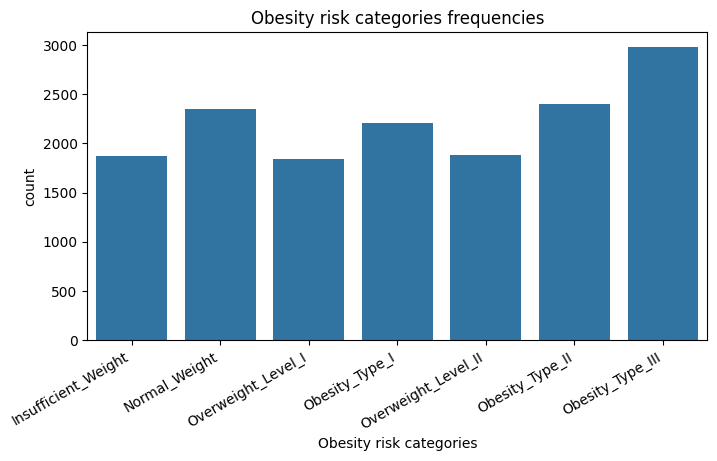

In [ ]:
plt.figure(figsize=(8,4))
target_categories = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Obesity_Type_I",
    "Overweight_Level_II",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
ax = sb.countplot(x=train['WeightCategory'], order=target_categories)
plt.title("Obesity risk categories frequencies")
plt.xlabel("Obesity risk categories")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    label_encoders[col] = le

target_encoder = LabelEncoder()
train[target_col[0]] = target_encoder.fit_transform(train[target_col[0]].astype(str))

In [ ]:
train.describe()

id        Gender           Age        Height        Weight  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean    7766.000000      0.501062     23.816308      1.699918     87.785225   
std     4484.135201      0.500015      5.663167      0.087670     26.369144   
min        0.000000      0.000000     14.000000      1.450000     39.000000   
25%     3883.000000      0.000000     20.000000      1.630927     66.000000   
50%     7766.000000      1.000000     22.771612      1.700000     84.000000   
75%    11649.000000      1.000000     26.000000      1.762921    111.600553   
max    15532.000000      1.000000     61.000000      1.975663    165.057269   

       family_history_with_overweight          FAVC          FCVC  \
count                    15533.000000  15533.000000  15533.000000   
mean                         0.817357      0.913153      2.442917   
std                          0.386386      0.281620      0.530895   
min                          0.000000      0.000000      1.000000   
25%                          1.000000      1.000000      2.000000   
50%                          1.000000      1.000000      2.342220   
75%                          1.000000      1.000000      3.000000   
max                          1.000000      1.000000      3.000000   

                NCP          CAEC         SMOKE          CH2O           SCC  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean       2.760425      1.848902      0.011395      2.027626      0.033091   
std        0.706463      0.446058      0.106141      0.607733      0.178880   
min        1.000000      0.000000      0.000000      1.000000      0.000000   
25%        3.000000      2.000000      0.000000      1.796257      0.000000   
50%        3.000000      2.000000      0.000000      2.000000      0.000000   
75%        3.000000      2.000000      0.000000      2.531456      0.000000   
max        4.000000      3.000000      1.000000      3.000000      1.000000   

                FAF           TUE          CALC        MTRANS  WeightCategory  
count  15533.000000  15533.000000  15533.000000  15533.000000    15533.000000  
mean       0.976968      0.613813      1.221078      2.501384        2.987575  
std        0.836841      0.602223      0.473942      1.152353        1.893756  
min        0.000000      0.000000      0.000000      0.000000        0.000000  
25%        0.007050      0.000000      1.000000      3.000000        1.000000  
50%        1.000000      0.566353      1.000000      3.000000        3.000000  
75%        1.582675      1.000000      1.000000      3.000000        4.000000  
max        3.000000      2.000000      2.000000      4.000000        6.000000

In [ ]:
train.corr()

id    Gender       Age    Height  \
id                              1.000000  0.012246  0.002002  0.012841   
Gender                          0.012246  1.000000  0.060298  0.620797   
Age                             0.002002  0.060298  1.000000 -0.014824   
Height                          0.012841  0.620797 -0.014824  1.000000   
Weight                          0.013919  0.117774  0.280320  0.420702   
family_history_with_overweight  0.005566  0.093147  0.262537  0.229961   
FAVC                           -0.003402  0.021916  0.048370  0.118650   
FCVC                           -0.010433 -0.312216  0.030279 -0.067065   
NCP                            -0.003287  0.042015 -0.051373  0.196410   
CAEC                            0.005505  0.051669  0.146515  0.074445   
SMOKE                           0.013246  0.058608  0.060122  0.066814   
CH2O                            0.005152  0.054988 -0.021965  0.186031   
SCC                            -0.018500 -0.058699 -0.108017 -0.095829   
FAF                             0.017722  0.236829 -0.194451  0.298812   
TUE                             0.001273  0.058585 -0.294959  0.080091   
CALC                            0.001304  0.029438 -0.076990 -0.091133   
MTRANS                          0.012399 -0.135570 -0.602646 -0.046342   
WeightCategory                  0.016116  0.050023  0.276410  0.063885   

                                  Weight  family_history_with_overweight  \
id                              0.013919                        0.005566   
Gender                          0.117774                        0.093147   
Age                             0.280320                        0.262537   
Height                          0.420702                        0.229961   
Weight                          1.000000                        0.514943   
family_history_with_overweight  0.514943                        1.000000   
FAVC                            0.227025                        0.151242   
FCVC                            0.248445                        0.046119   
NCP                             0.096474                        0.045115   
CAEC                            0.338708                        0.207451   
SMOKE                           0.042901                        0.019353   
CH2O                            0.316199                        0.191424   
SCC                            -0.185086                       -0.163128   
FAF                            -0.075771                       -0.091839   
TUE                            -0.082261                        0.003199   
CALC                           -0.212613                        0.005343   
MTRANS                         -0.002281                       -0.109544   
WeightCategory                  0.429833                        0.320433   

                                    FAVC      FCVC       NCP      CAEC  \
id                             -0.003402 -0.010433 -0.003287  0.005505   
Gender                          0.021916 -0.312216  0.042015  0.051669   
Age                             0.048370  0.030279 -0.051373  0.146515   
Height                          0.118650 -0.067065  0.196410  0.074445   
Weight                          0.227025  0.248445  0.096474  0.338708   
family_history_with_overweight  0.151242  0.046119  0.045115  0.207451   
FAVC                            1.000000  0.009623  0.015928  0.117968   
FCVC                            0.009623  1.000000  0.107310 -0.011027   
NCP                             0.015928  0.107310  1.000000 -0.091344   
CAEC                            0.117968 -0.011027 -0.091344  1.000000   
SMOKE                          -0.016430 -0.007766  0.006481 -0.016666   
CH2O                            0.037504  0.103753  0.073561  0.138915   
SCC                            -0.112929  0.027112  0.012680 -0.101940   
FAF                            -0.059819 -0.081098  0.105726 -0.089105   
TUE                             0.033899 -0.150290  0.074077 -0.046145   
CA

correlation matrix

Text(0.5, 1.0, 'Correlation of Features')

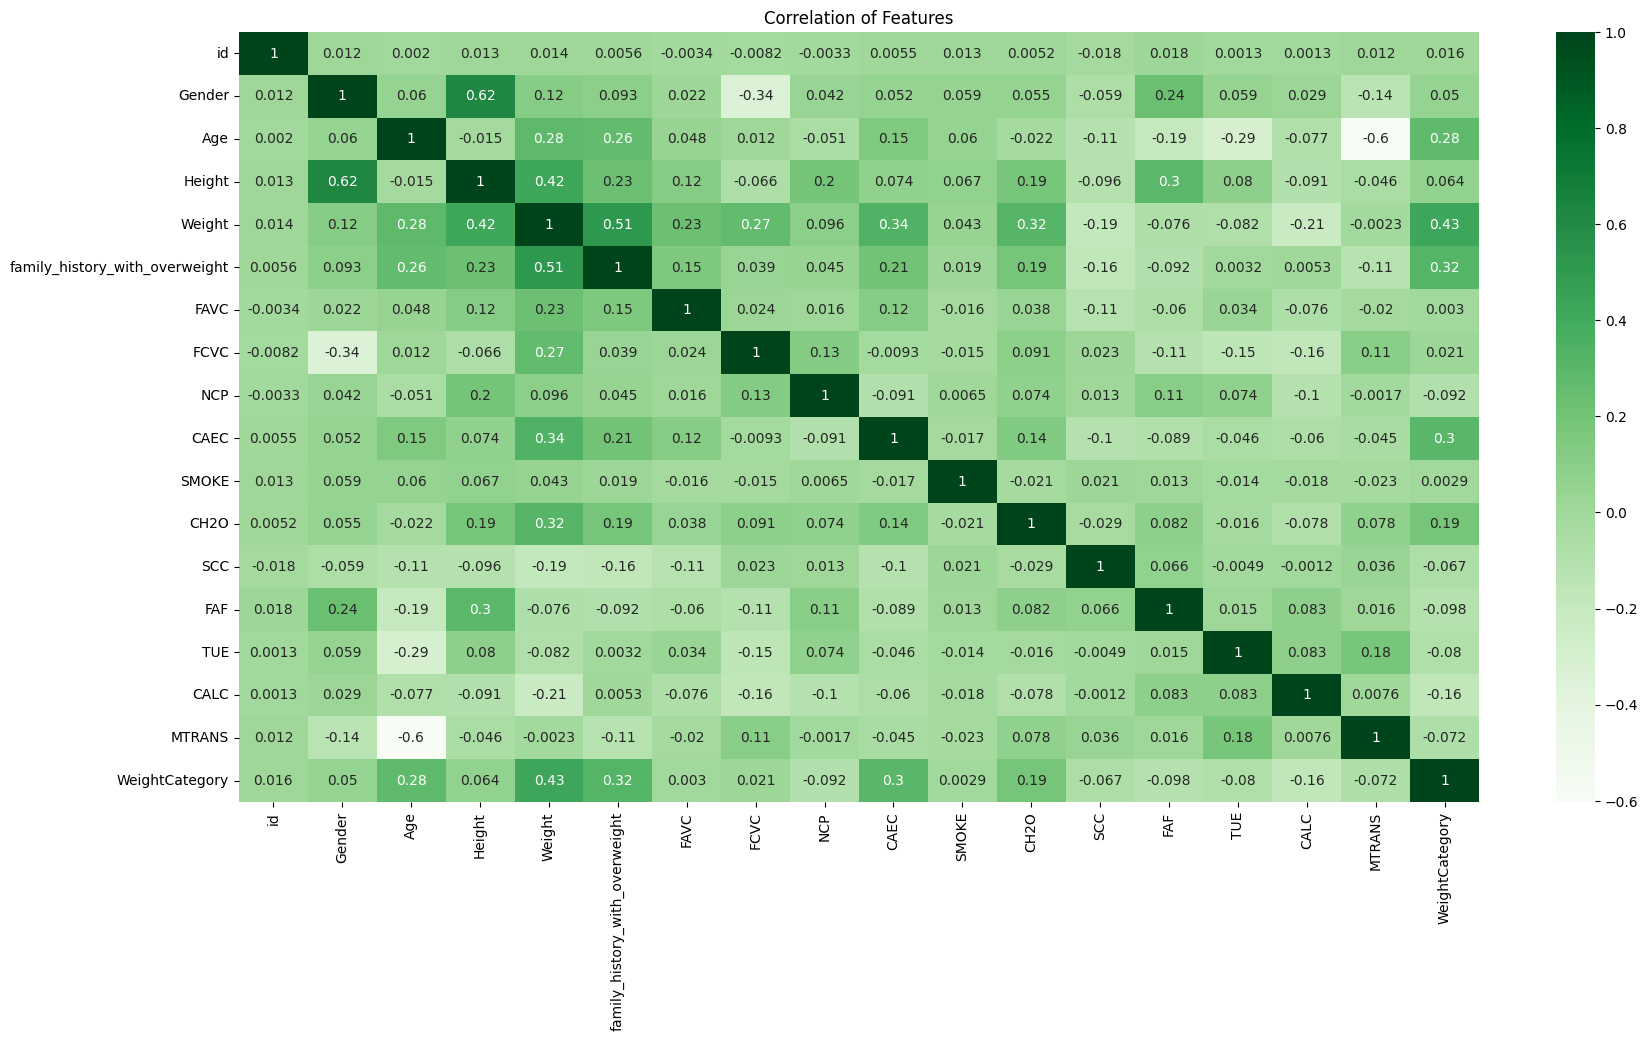

In [ ]:
plt.figure(figsize = (20,10))
sb.heatmap(train.corr(),annot=True , cmap ='greens' )
plt.title("Correlation of Features")

Boxplots of each column with target column

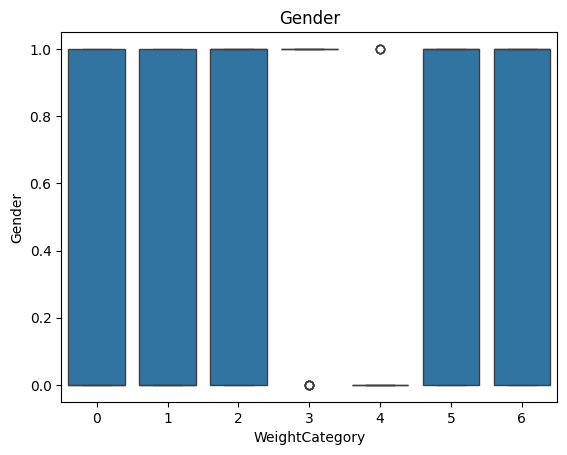

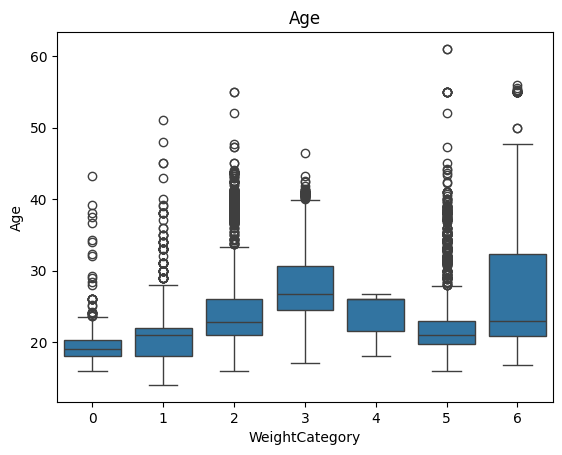

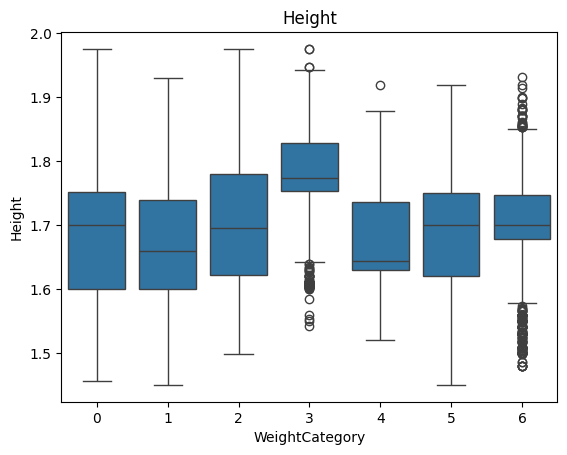

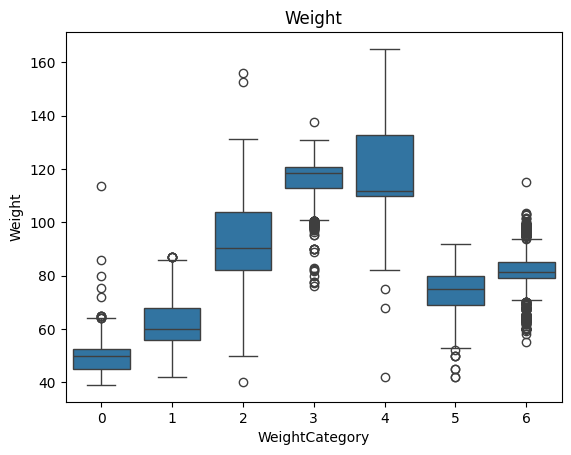

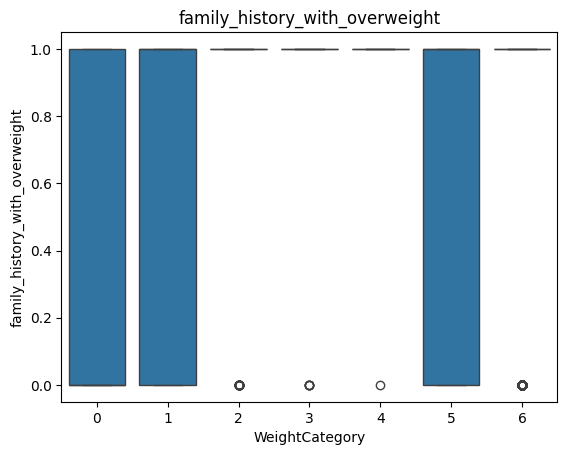

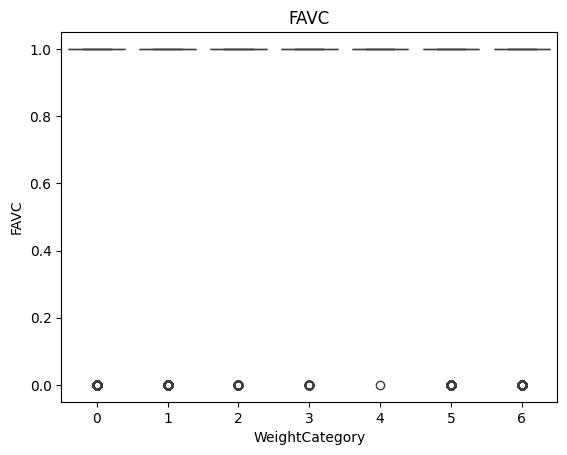

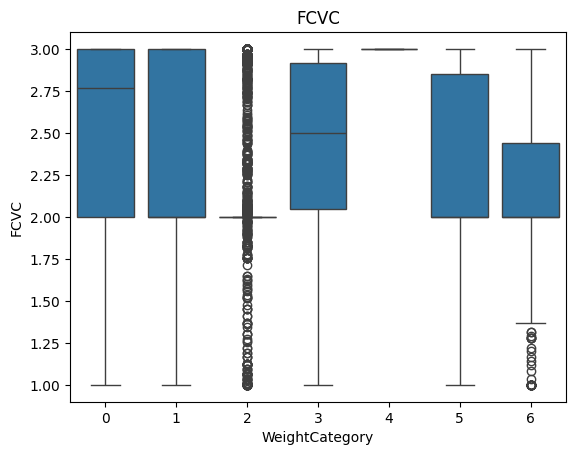

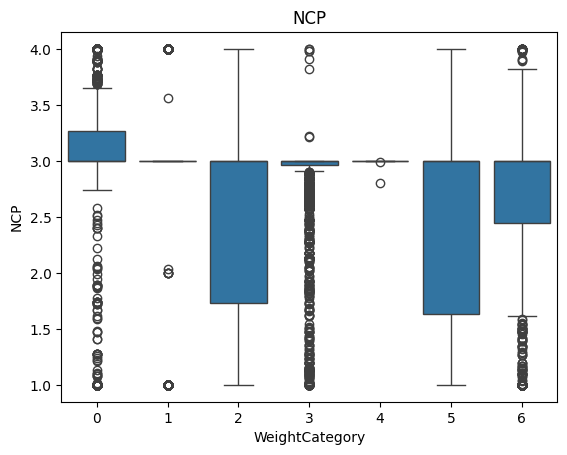

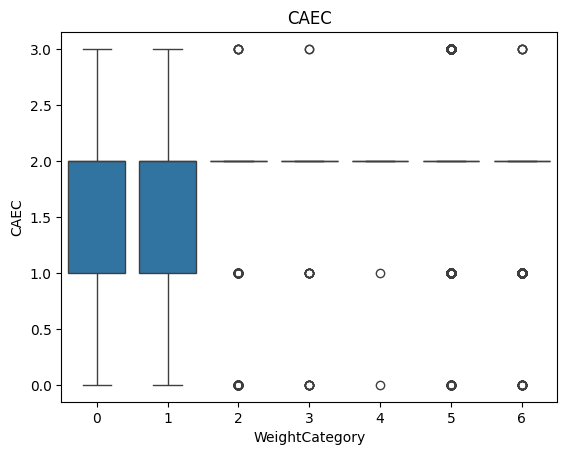

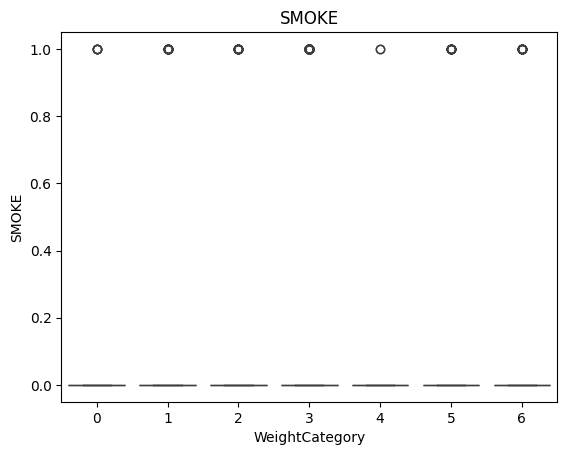

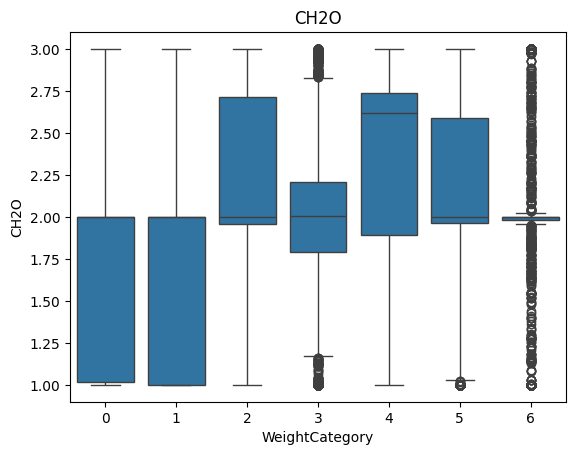

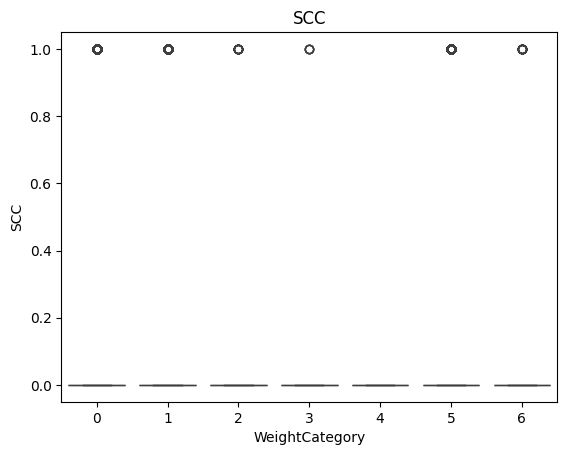

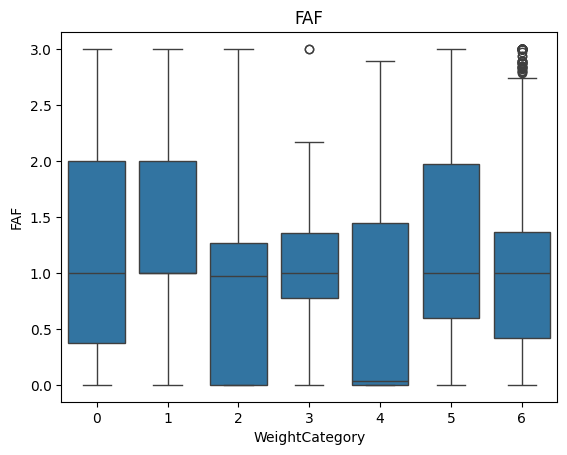

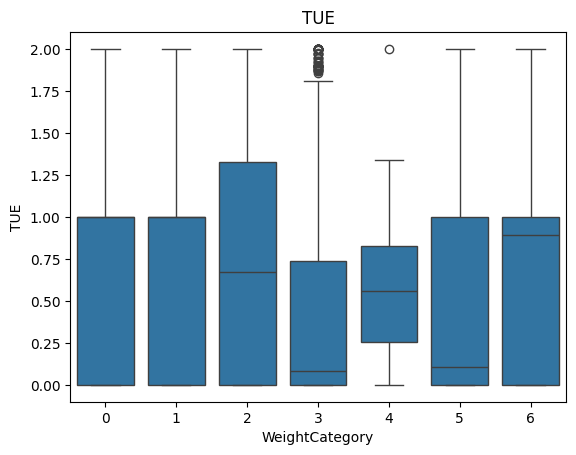

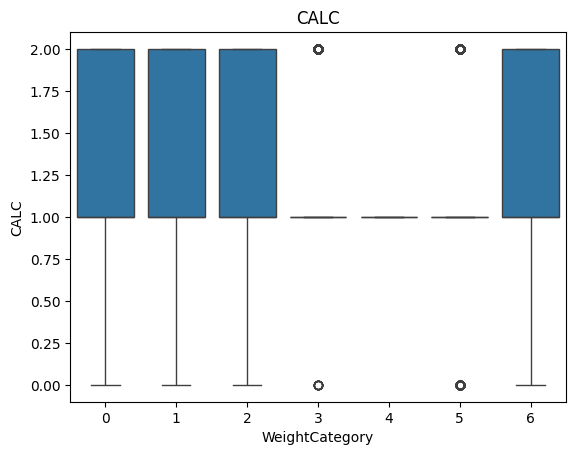

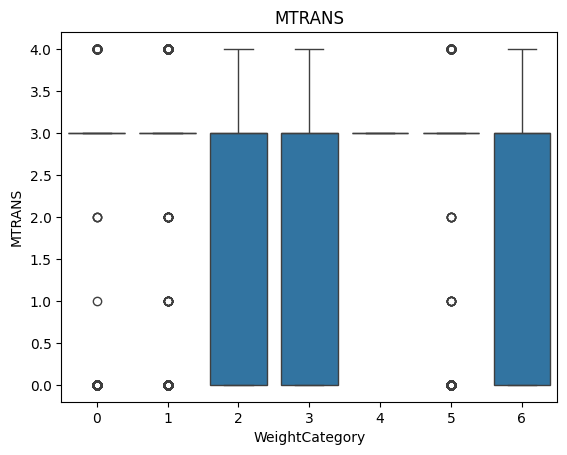

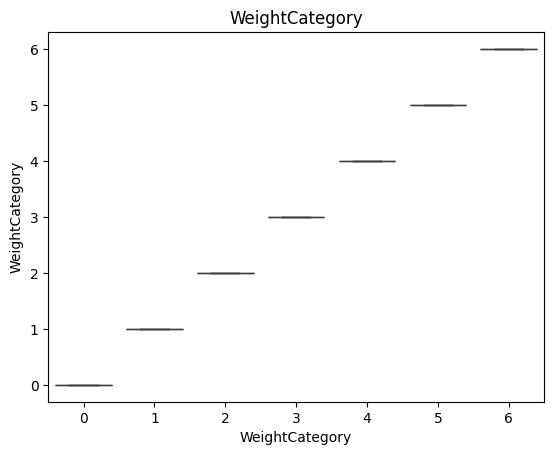

In [ ]:
for i,col in enumerate(train.columns[1:]):
  sb.boxplot(x='WeightCategory', y= col, data = train)
  plt.title(col)
  plt.show()

distribution plot according to target column

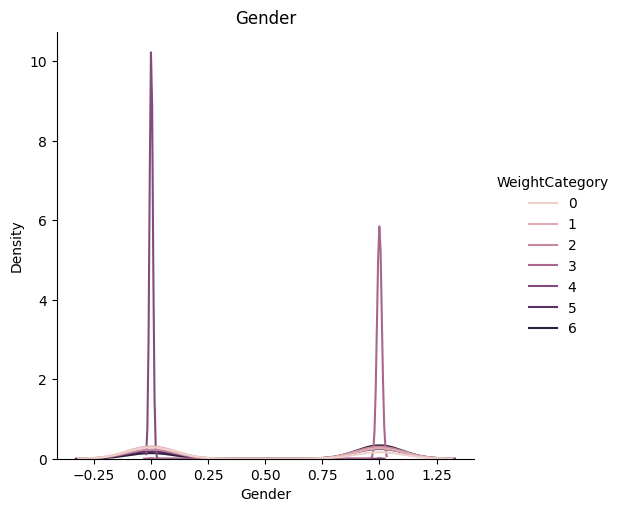

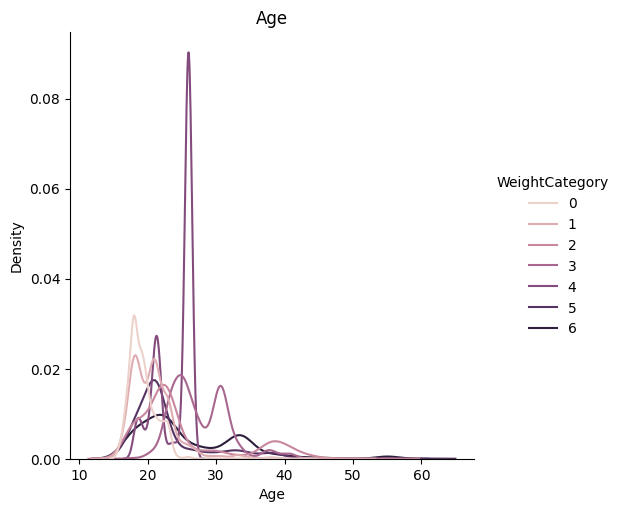

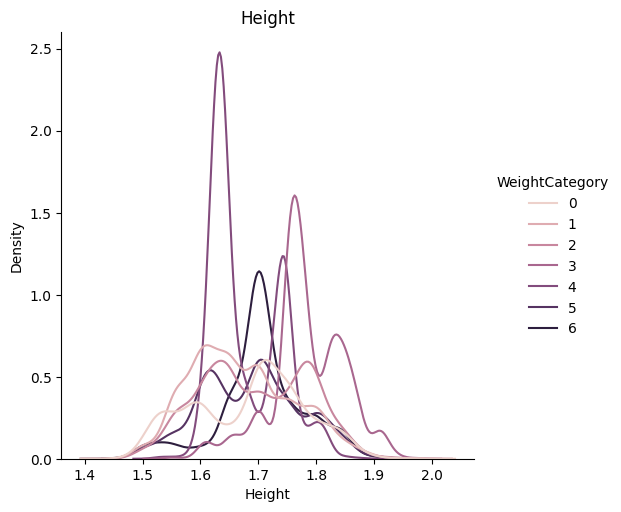

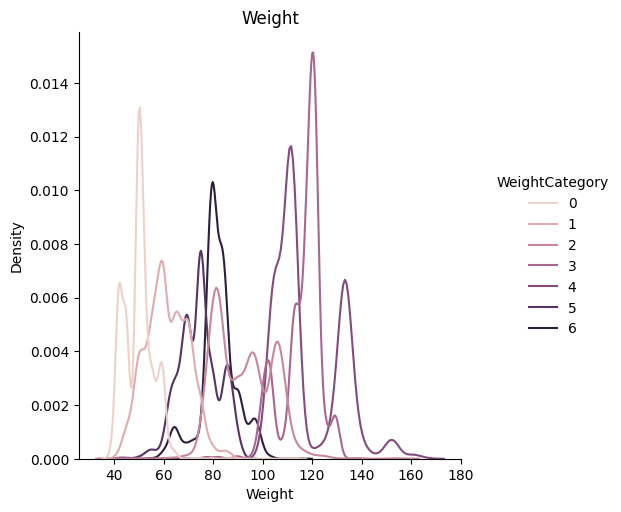

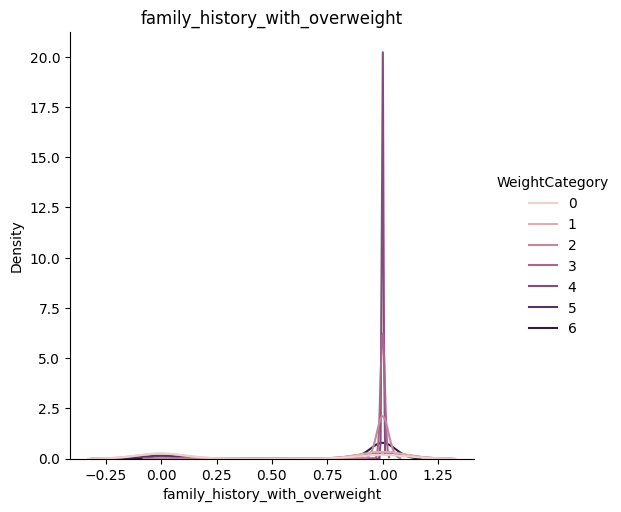

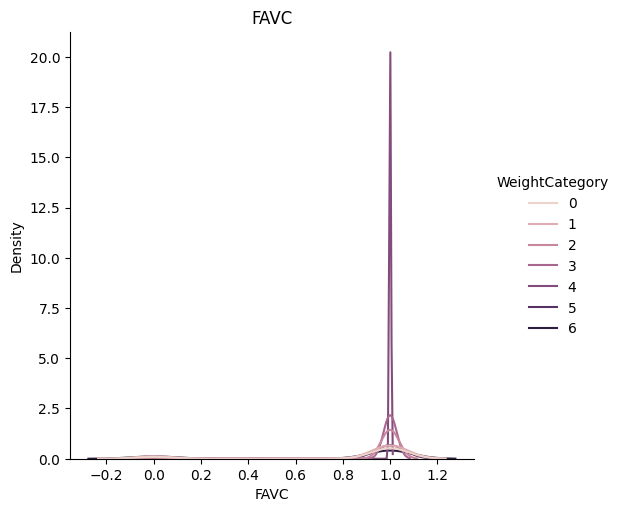

/tmp/ipython-input-1125361143.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.displot(data=train, x=col, hue='WeightCategory', kind="kde")


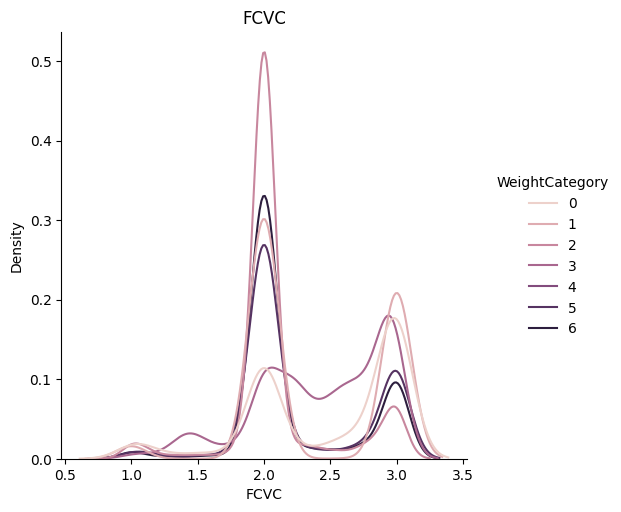

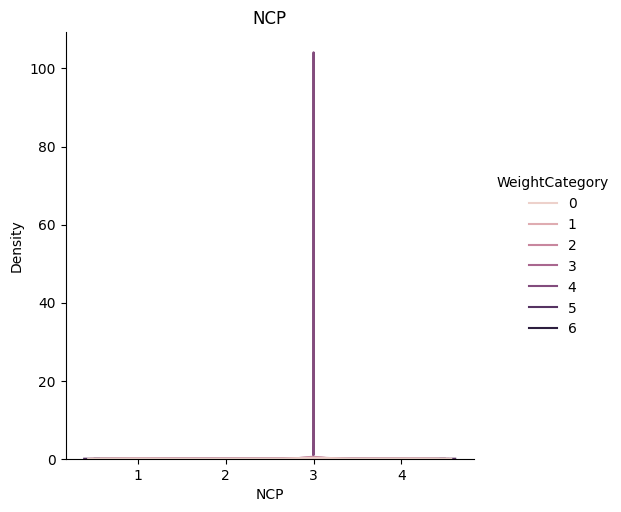

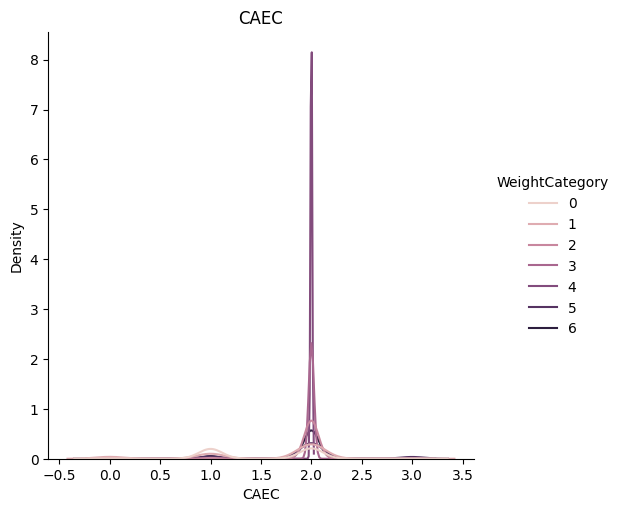

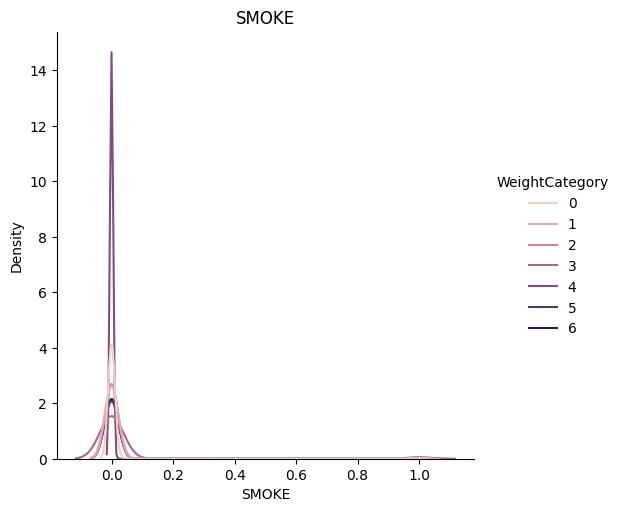

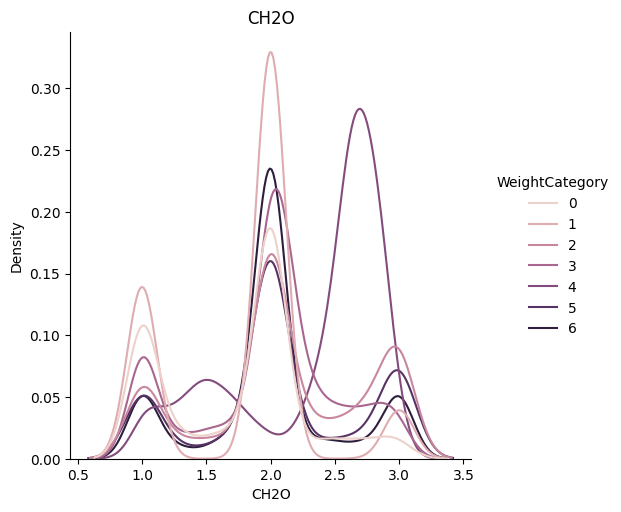

/tmp/ipython-input-1125361143.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.displot(data=train, x=col, hue='WeightCategory', kind="kde")


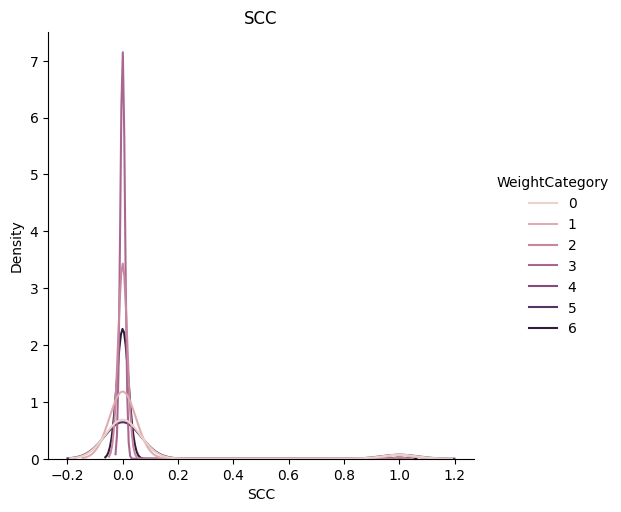

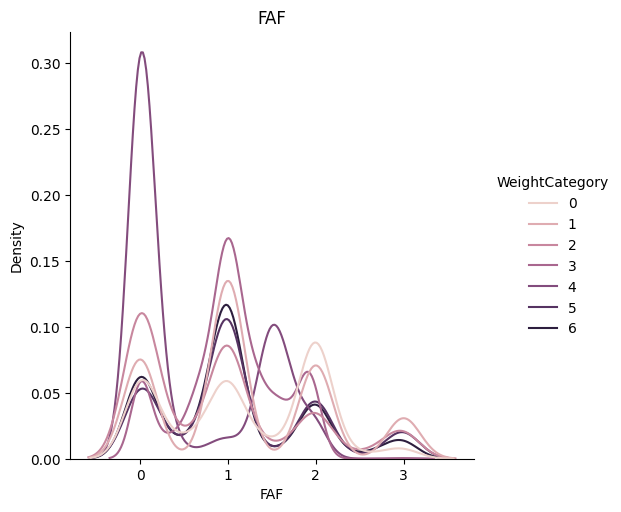

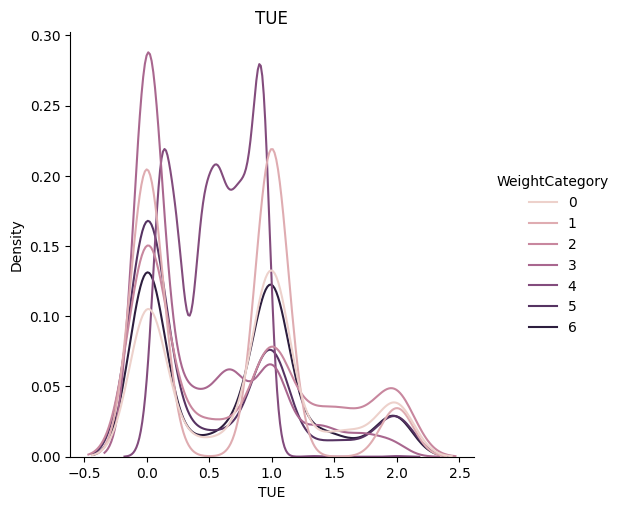

/tmp/ipython-input-1125361143.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.displot(data=train, x=col, hue='WeightCategory', kind="kde")


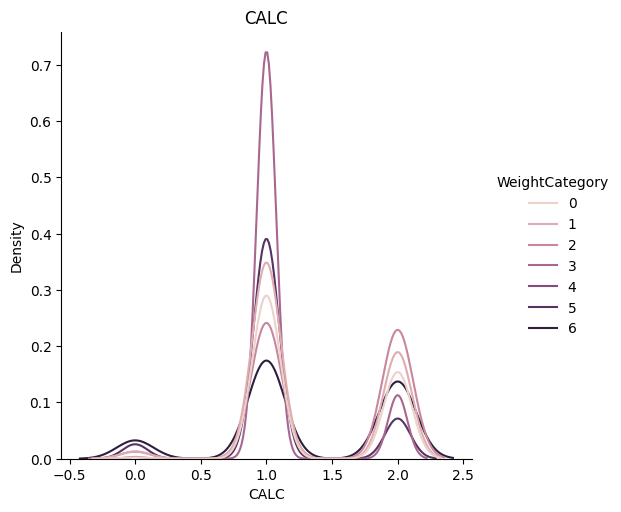

/tmp/ipython-input-1125361143.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.displot(data=train, x=col, hue='WeightCategory', kind="kde")


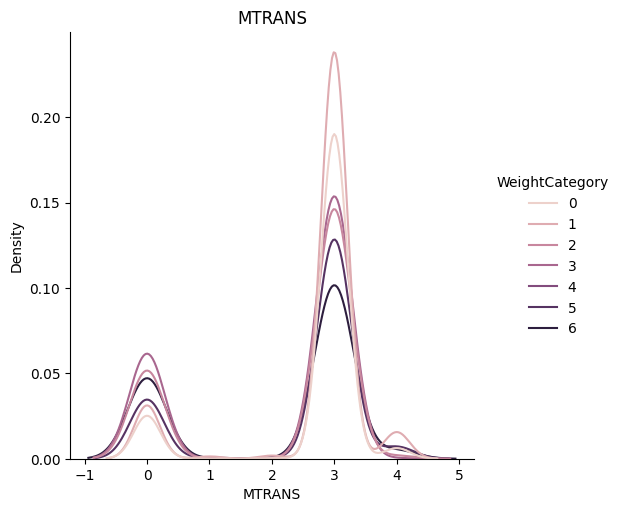

/tmp/ipython-input-1125361143.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.displot(data=train, x=col, hue='WeightCategory', kind="kde")


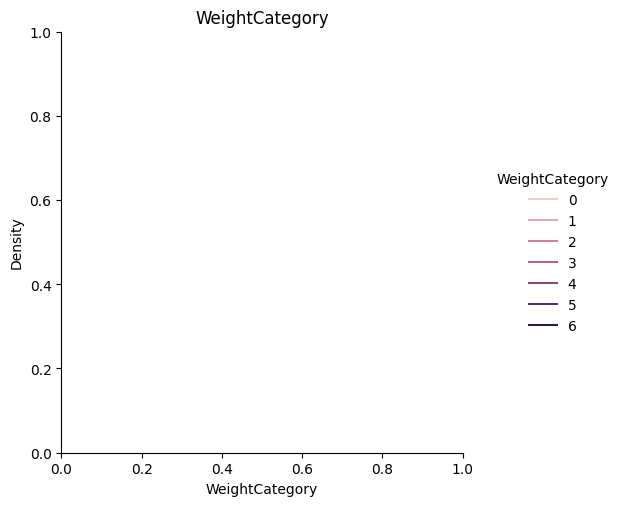

In [ ]:
for col in train.columns[1:]:
  sb.displot(data=train, x=col, hue='WeightCategory', kind="kde")
  plt.title(col)
  plt.xlabel(col)
  plt.show()

checking for duplicate rows

In [ ]:
print(f"There are {train.duplicated().sum()} duplicates in the train data.")
print(f"There are {test.duplicated().sum()} duplicates in the test data.")
train.drop_duplicates(inplace=True)

There are 0 duplicates in the train data.
There are 0 duplicates in the test data.


In [ ]:
x = train.drop('WeightCategory', axis=1)
x = x.drop('id', axis=1)
y = train['WeightCategory']

In [ ]:
a = test['id']
z = test.drop('id', axis=1)

train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

scaling data

In [ ]:
def scale_dataset(x,y,scaler=None):
  if scaler is None:
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
  else:
    x=scaler.transform(x)
  return x,y,scaler

In [ ]:
x_train,y_train,scaler = scale_dataset(x_train,y_train)
x_test,y_test,scaler = scale_dataset(x_test,y_test,scaler)

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
y_pred_proba = knn_model.predict_proba(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

Accuracy:  0.7286771805600257
AUC score:  0.9097988927097332


Hyperparameter tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 18, 20]
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
knn_best_model = grid_search.best_estimator_
y_pred = knn_best_model.predict(x_test)
y_pred_proba = knn_best_model.predict_proba(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

{'n_neighbors': 5}
Accuracy:  0.7286771805600257
AUC score:  0.9097988927097332


confusion matrix of knn

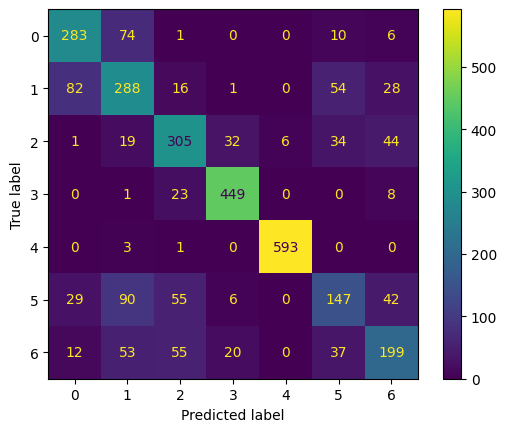

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_best_model,x_test,y_test)
plt.show()

ROC curve of KNN

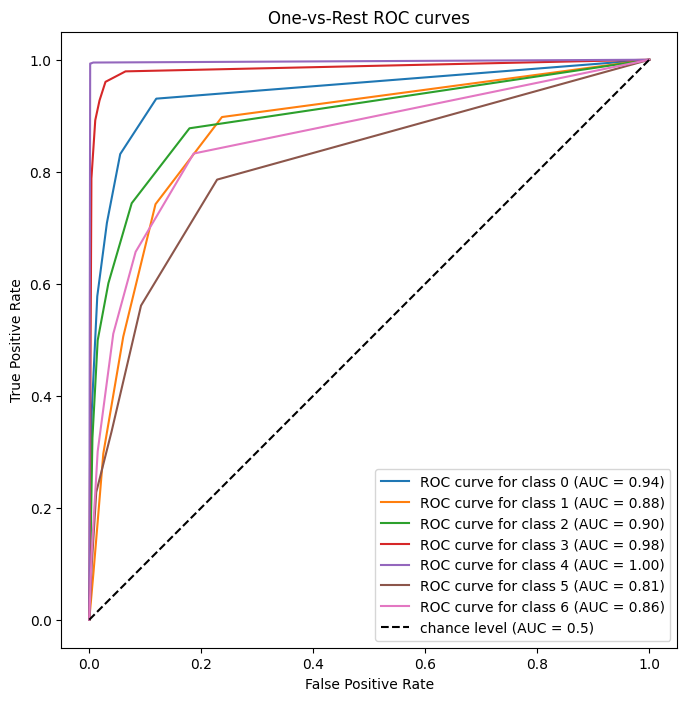

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = knn_best_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

##Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score

dec_tree_model = DecisionTreeClassifier(random_state=42)
dec_tree_model.fit(x_train, y_train)
y_pred = dec_tree_model.predict(x_test)
y_pred_proba = dec_tree_model.predict_proba(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

Accuracy:  0.8451882845188284
AUC score:  0.9029825711217286


Hyperparameter tuning of decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
param_grid = {
    'splitter': ['random', 'best'],
    'max_depth': [None, 1, 3, 5, 7, 9, 11, 13],
}

dec_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dec_tree_model, param_grid, cv=6, scoring='accuracy')
grid_search.fit(x_train, y_train)
dt_best_model = grid_search.best_estimator_
y_pred = dt_best_model.predict(x_test)
y_pred_proba = dt_best_model.predict_proba(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

{'max_depth': 9, 'splitter': 'best'}
Accuracy:  0.8616028323141294
AUC score:  0.9673241145676722


Confusion matrix of Decision tree

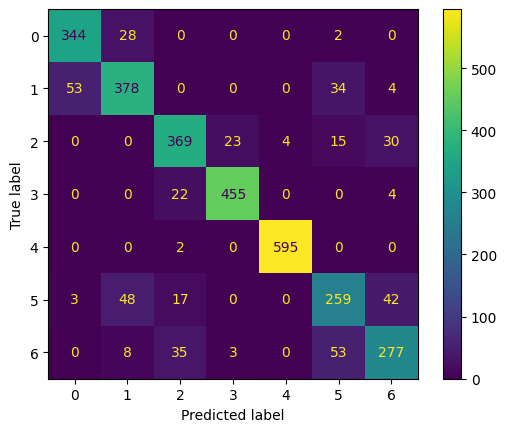

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_best_model,x_test,y_test)
plt.show()

ROC curve of Decision Tree

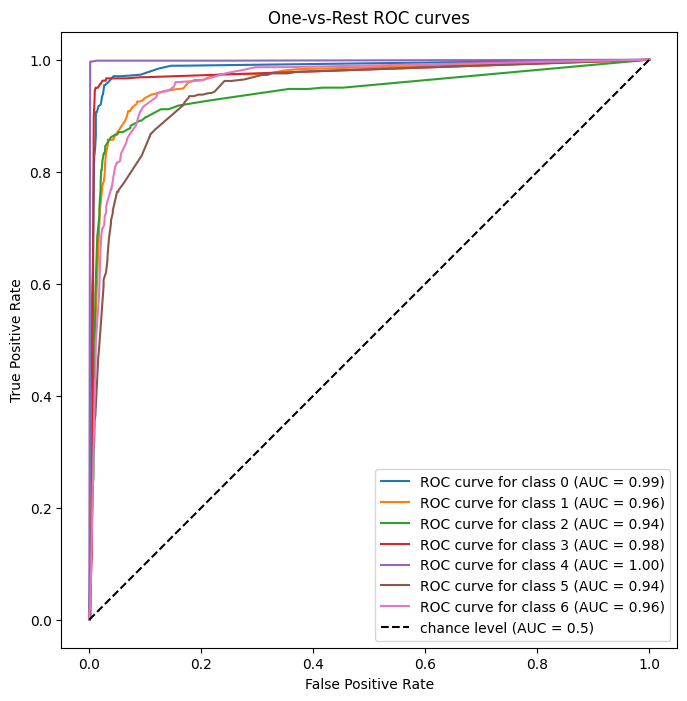

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = dt_best_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

Accuracy:  0.8966849050531059
AUC score:  0.9854641473654616


Hyperparameter tuning of random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
param_grid = {
    'n_estimators': [50,100,160,200,300],
    'max_depth': [7, 9, 11, 13, 17],
}

rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
rf_best_model = grid_search.best_estimator_
y_pred = rf_best_model.predict(x_test)
y_pred_proba = rf_best_model.predict_proba(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

{'max_depth': 17, 'n_estimators': 300}
Accuracy:  0.8979723205664628
AUC score:  0.9866190555801874


Confusion Matrix of random forest

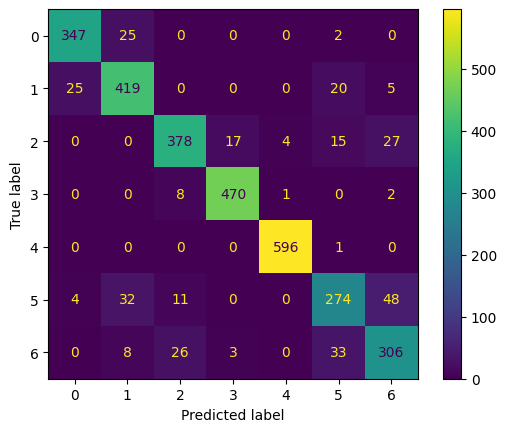

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_best_model,x_test,y_test)
plt.show()

ROC curve of Random Forest

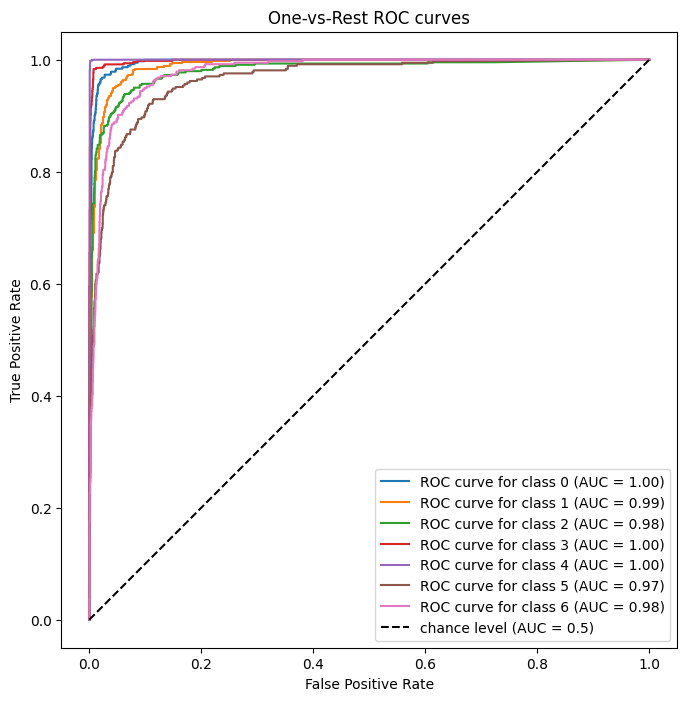

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = rf_best_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

##Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
from sklearn.svm import SVC

adaboost_model = AdaBoostClassifier(n_estimators=305, random_state=42)
adaboost_model.fit(x_train, y_train)
y_pred = adaboost_model.predict(x_test)
y_pred_proba = adaboost_model.predict_proba(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

Accuracy:  0.6504666881235919
AUC score:  0.9207382156144146


Hyperparameter tuning of adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
param_grid = {
    'n_estimators': [100, 200, 305, 500, 600, 700],
    'learning_rate': [0.1,0.25,0.5, 0.8, 1]
}

adaboost_model = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
ada_best_model = grid_search.best_estimator_
y_pred = ada_best_model.predict(x_test)
y_pred_proba = ada_best_model.predict_proba(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("AUC score: ",roc_auc_score(y_test,y_pred_proba, multi_class='ovr'))

{'learning_rate': 0.5, 'n_estimators': 200}
Accuracy:  0.733183134856775
AUC score:  0.9281467822941251


Confusion Matrix of adaboost classifier

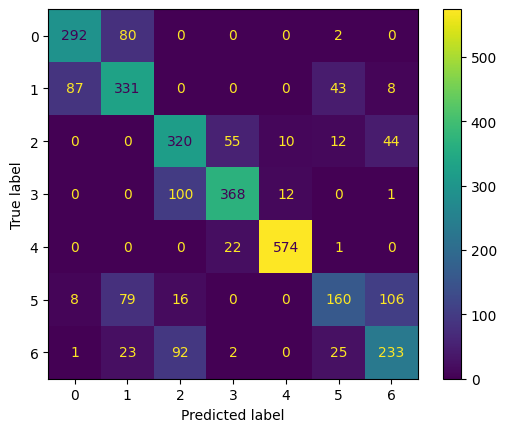

In [ ]:
ConfusionMatrixDisplay.from_estimator(ada_best_model,x_test,y_test)
plt.show()

ROC Curve of random forest

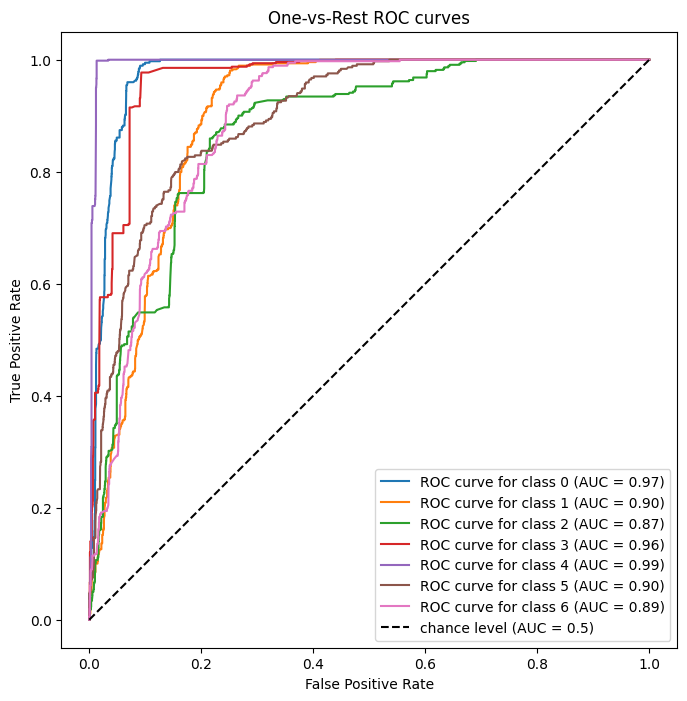

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = ada_best_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

XG-BOOST

In [ ]:
xgb = XGBClassifier(
    n_estimators=350, learning_rate=0.04, max_depth=6,
    subsample=0.85, colsample_bytree=0.85, min_child_weight=3,
    gamma=0.25, reg_alpha=0.5, reg_lambda=2,
    random_state=42, eval_metric='mlogloss',
    use_label_encoder=False, n_jobs=-1
)
xgb.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:00:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.25,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred = xgb.predict(x_test)
train_acc = accuracy_score(y_train_pred, y_test)
print(f"✅ Testing Accuracy: {train_acc:.4f}")

✅ Testing Accuracy: 0.9060


Confusion Matrix of xgboost

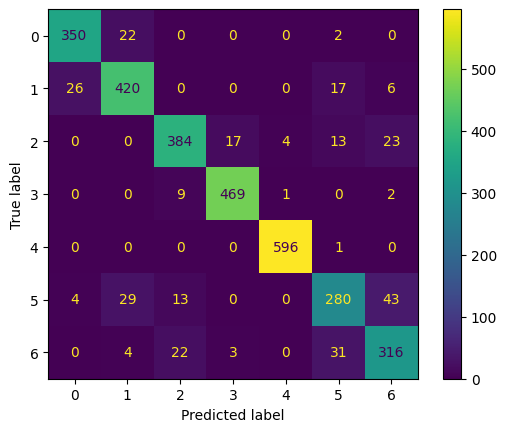

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb,x_test,y_test)
plt.show()

ROC Curve of xgboost

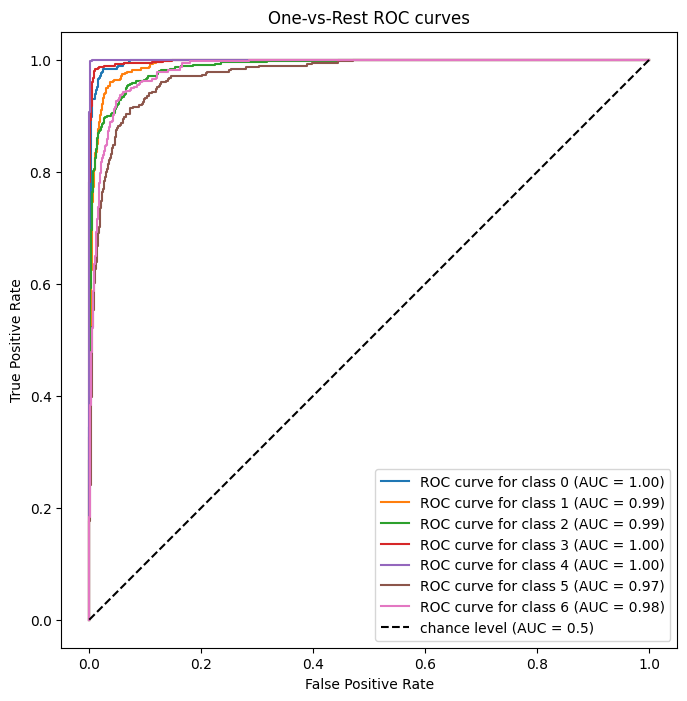

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = xgb.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

Hyperparameter Tuning usin Random_Search_CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

In [ ]:
xgb_rsc = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

In [ ]:
param_dist = {
    'n_estimators': np.arange(300, 601, 50),
    'learning_rate': np.linspace(0.025, 0.06, 8),
    'max_depth': [4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.75, 0.8, 0.85, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.85, 0.9],
    'gamma': np.linspace(0, 0.4, 5),
    'reg_alpha': [0, 0.2, 0.4, 0.6, 0.8],
    'reg_lambda': [1, 1.5, 2, 2.5, 3]
}

In [ ]:
rand_search = RandomizedSearchCV(
    estimator=xgb_rsc,
    param_distributions=param_dist,
    n_iter=60,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rand_search.fit(X_train, y_train_enc)

print("✅ Best parameters:", rand_search.best_params_)
print("✅ CV Accuracy:", rand_search.best_score_ * 100)

best_xgb = rand_search.best_estimator_
best_xgb.fit(X_train, y_train_enc)

y_pred = best_xgb.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:32:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters: {'subsample': 0.75, 'reg_lambda': 3, 'reg_alpha': 0.2, 'n_estimators': np.int64(400), 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': np.float64(0.04), 'gamma': np.float64(0.2), 'colsample_bytree': 0.7}
✅ CV Accuracy: 90.78740836335125


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:32:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
best_params = {
    'subsample': 0.75,
    'reg_lambda': 3.0,
    'reg_alpha': 0.2,
    'n_estimators': 400,
    'min_child_weight': 4,
    'max_depth': 5,
    'learning_rate': 0.04,
    'gamma': 0.2,
    'colsample_bytree': 0.7,
}

best_params["objective"] = "multi:softprob"
best_params["eval_metric"] = "mlogloss"
best_params["use_label_encoder"] = False
best_params["nthread"] = -1
best_params["random_state"] = 42


In [ ]:
best_params = best_params
xgb_rcv = XGBClassifier(**best_params)
xgb_rcv.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:11:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, nthread=-1, ...)

In [ ]:
y_train_pred = xgb_rcv.predict(x_train)
y_test_pred = xgb_rcv.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9414936423627877
Test Accuracy: 0.9069842291599614


confusion matrix of xgboost(random search cv)

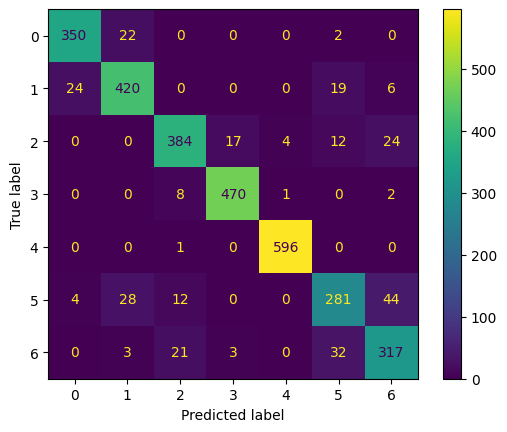

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_rcv,x_test,y_test)
plt.show()

ROC Curve of xgboost(random search cv)

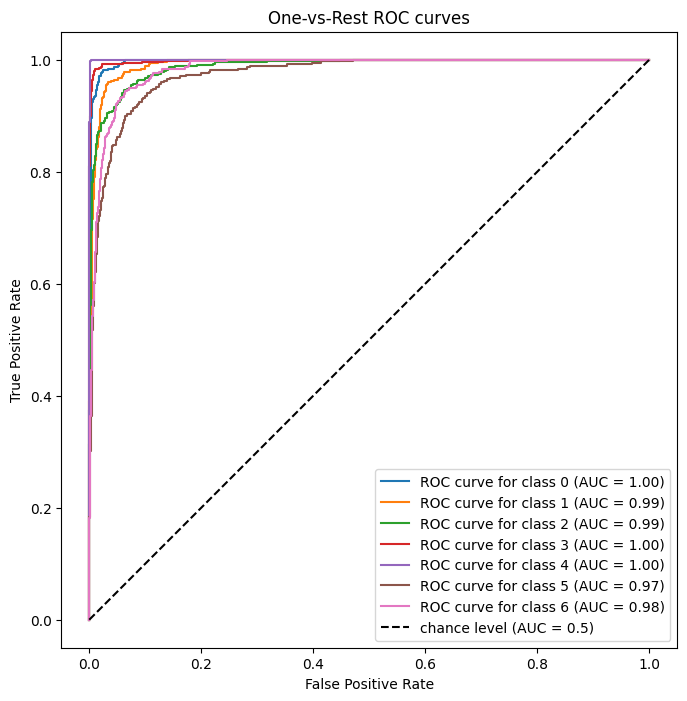

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = xgb_rcv.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

# XG_BOOST_OPTUNA_

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.7 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 350, 650,log = True),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.07),
        'subsample': trial.suggest_float('subsample', 0.4, 1.2),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.2),
        'gamma': trial.suggest_float('gamma', 0.3, 0.6,log = True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
        'reg_alpha' : trial.suggest_float("reg_alpha", 1e-8, 10, log=True),
        'reg_lambda' : trial.suggest_float("reg_lambda", 1e-8, 10, log=True),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }

    model = XGBClassifier(**params)

    # 5-fold cross-validation accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    return scores.mean()


In [ ]:
storage_name = "sqlite:///xgb_optuna.db"
study = optuna.create_study(
    study_name="xgb_tuning",
    storage=storage_name,
    load_if_exists=True,
    direction="maximize"
)
study.optimize(objective, n_trials=250, show_progress_bar=True)


[I 2025-10-23 15:34:09,768] A new study created in memory with name: no-name-a0aa8ba1-4913-466e-bfb7-a2846766694c


  0%|          | 0/250 [00:00<?, ?it/s]

[I 2025-10-23 15:34:34,141] Trial 0 finished with value: 0.9048770499100799 and parameters: {'n_estimators': 318, 'max_depth': 7, 'learning_rate': 0.04140984824858862, 'subsample': 0.5335382397220898, 'colsample_bytree': 0.7818064153249299, 'gamma': 0.2650196012819038, 'min_child_weight': 2}. Best is trial 0 with value: 0.9048770499100799.
[I 2025-10-23 15:34:50,910] Trial 1 finished with value: 0.9037501274744202 and parameters: {'n_estimators': 332, 'max_depth': 5, 'learning_rate': 0.030387149337574266, 'subsample': 0.9576970319233528, 'colsample_bytree': 0.5614975039071951, 'gamma': 0.12421907611823164, 'min_child_weight': 3}. Best is trial 0 with value: 0.9048770499100799.
[I 2025-10-23 15:35:08,836] Trial 2 finished with value: 0.9044743764275112 and parameters: {'n_estimators': 339, 'max_depth': 7, 'learning_rate': 0.04757355905443403, 'subsample': 0.8431817896854454, 'colsample_bytree': 0.7103139803719982, 'gamma': 0.3725729253001169, 'min_child_weight': 3}. Best is trial 0 with

In [1]:
# Best Parameters: {'n_estimators': 590, 'max_depth': 8, 'learning_rate': 0.04771408889915993, 'subsample': 0.5337984833180236, 'colsample_bytree': 0.4095606533788035, 'gamma': 0.590600496713342, 'min_child_weight': 2}
# Best Accuracy: 0.9095444104692515
91.515

91.515

In [ ]:
best_params = {
    'n_estimators': 590,
    'learning_rate': 0.04771408889915993,
    'max_depth': 8,
    'subsample': 0.5337988433180236,
    'colsample_bytree': 0.4095606,
    'min_child_weight': 2,
    'gamma': 0.5906,
    'reg_alpha': 0.5,
    'reg_lambda': 2,
}

best_params["objective"] = "multi:softprob"
best_params["eval_metric"] = "mlogloss"
best_params["use_label_encoder"] = False
best_params["nthread"] = -1
best_params["random_state"] = 42

In [ ]:
best_params = best_params
xgb_best_model = XGBClassifier(**best_params)
xgb_best_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:19:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4095606, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0.5906, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04771408889915993,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=590, n_jobs=None, nthread=-1, ...)

In [ ]:
y_train_pred = xgb_best_model.predict(x_train)
y_test_pred = xgb_best_model.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9442298406566876
Test Accuracy: 0.9076279369166399


### confusion matrix of xgboost(Optuna)

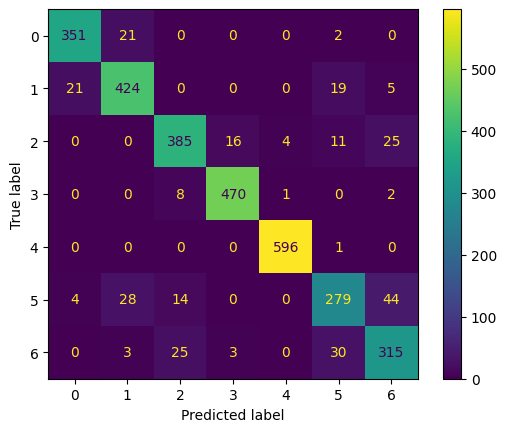

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_best_model,x_test,y_test)
plt.show()

ROC Curve of xgboost

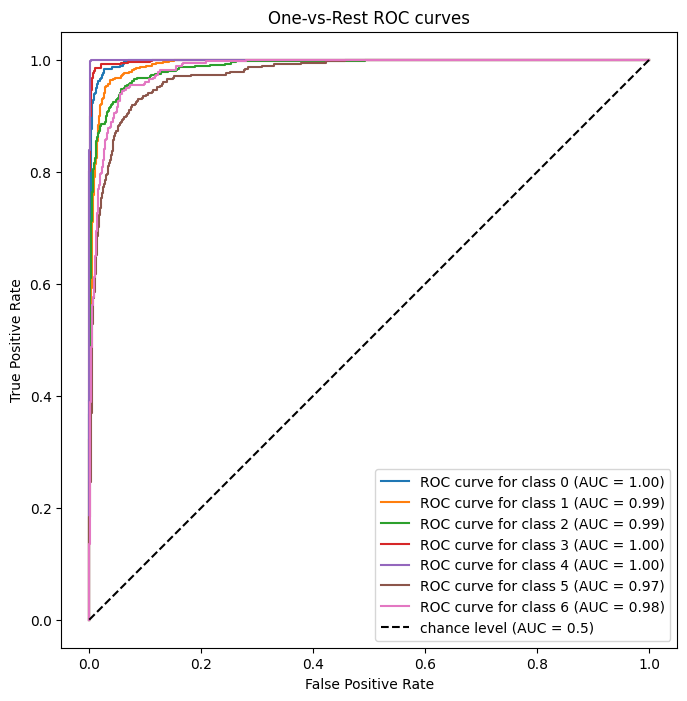

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability estimates for each class
y_score = xgb_best_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_score[:, i],
        name=f"ROC curve for class {i}",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

In [ ]:
testpred = xgb_best_model.predict(z)
print(testpred)

[4 5 6 ... 2 6 3]


In [ ]:
testprednew = target_encoder.inverse_transform(testpred)
print(testprednew)

['Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II' ...
 'Obesity_Type_I' 'Overweight_Level_II' 'Obesity_Type_II']


In [ ]:
dfnew = pd.DataFrame()
dfnew['id'] = a
dfnew['WeightCategory'] = testprednew
print(dfnew)

         id       WeightCategory
0     15533     Obesity_Type_III
1     15534   Overweight_Level_I
2     15535  Overweight_Level_II
3     15536      Obesity_Type_II
4     15537        Normal_Weight
...     ...                  ...
5220  20753      Obesity_Type_II
5221  20754  Insufficient_Weight
5222  20755       Obesity_Type_I
5223  20756  Overweight_Level_II
5224  20757      Obesity_Type_II

[5225 rows x 2 columns]


In [ ]:
dfnew.to_csv('submission.csv', index=False)
print("submission.csv created successfully!")

submission.csv created successfully!


Feature Importance Of The Result

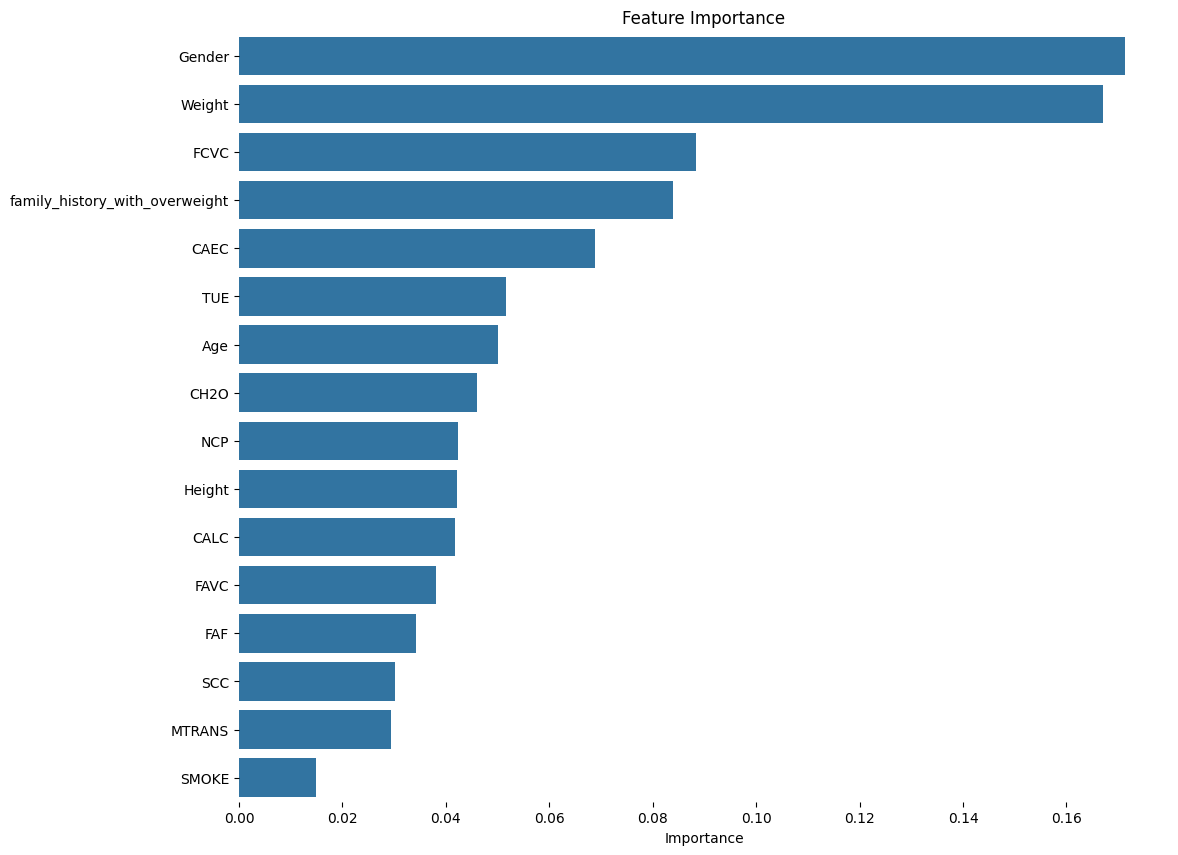

In [ ]:
feature_importance = xgb_best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sb.despine(left=True, bottom=True)
plt.show()

##Model Comparision

In [ ]:
from sklearn.metrics import accuracy_score

models = {
    "Adaboost": ada_best_model,
    "Random Forest": rf_best_model,
    "XGBoost": xgb,
    "XGBoost(Rcv)": xgb_rcv,
    "XGBoost(Optuna)": xgb_best_model,
    "Decision Tree": dt_best_model,
    "KNN": knn_best_model
}

accuracies = {}

for name, model in models.items():
    y_pred = model.predict(x_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

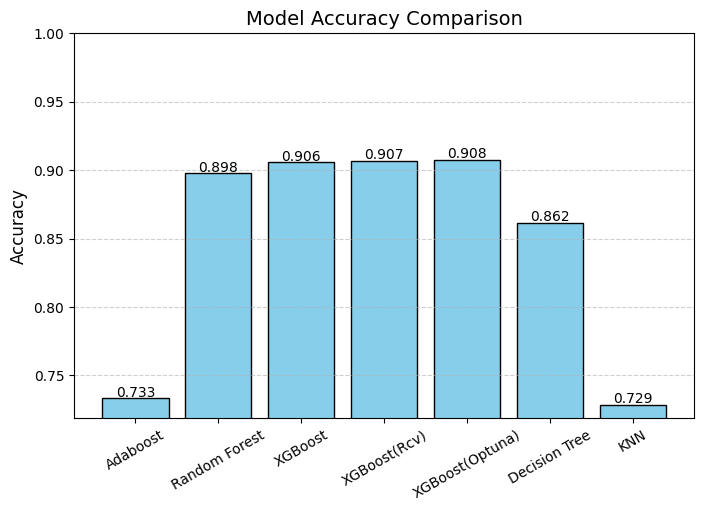

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue', edgecolor='black')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30)

# 👇 Zoom in to highlight small differences
plt.ylim(min(accuracies.values()) - 0.01, 1.0)

# Add accuracy labels on top of bars
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.001, f"{v:.3f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
